<a href="https://colab.research.google.com/github/lobsangt15/Olympic-Research-Project/blob/main/Olympic_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import**

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## **2. Load Data**

In [52]:
data = pd.read_csv('athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## **3. Exploratory Data Analaysis**

1. **Data Types:**
     
  Missing values that need to be removed/cleaned in 'Age', 'Height', 'Weight',  and 'Medal' column. Missing values in 'Medal' column should be changed instead of being removed as NaN in 'Medal' just means the athlete didn't achieve a medal and not that the data is missing.




In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


2.

In [54]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### **Data Cleaning**

In [55]:
data['Medal'].fillna('No Medal', inplace=True)

medal_map = {'Gold': 1, 'Silver': 1, 'Bronze': 1, 'No Medal': 0}
data['Medal'] = data['Medal'].replace(medal_map)

data.dropna(subset=['Age', 'Height', 'Weight'], inplace=True)

data.info()
data.head()

/tmp/ipython-input-1849731331.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Medal'].fillna('No Medal', inplace=True)
/tmp/ipython-input-1849731331.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Medal'] = data['Medal'].replace(medal_map)


<class 'pandas.core.frame.DataFrame'>
Index: 206165 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      206165 non-null  int64  
 1   Name    206165 non-null  object 
 2   Sex     206165 non-null  object 
 3   Age     206165 non-null  float64
 4   Height  206165 non-null  float64
 5   Weight  206165 non-null  float64
 6   Team    206165 non-null  object 
 7   NOC     206165 non-null  object 
 8   Games   206165 non-null  object 
 9   Year    206165 non-null  int64  
 10  Season  206165 non-null  object 
 11  City    206165 non-null  object 
 12  Sport   206165 non-null  object 
 13  Event   206165 non-null  object 
 14  Medal   206165 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 25.2+ MB


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0


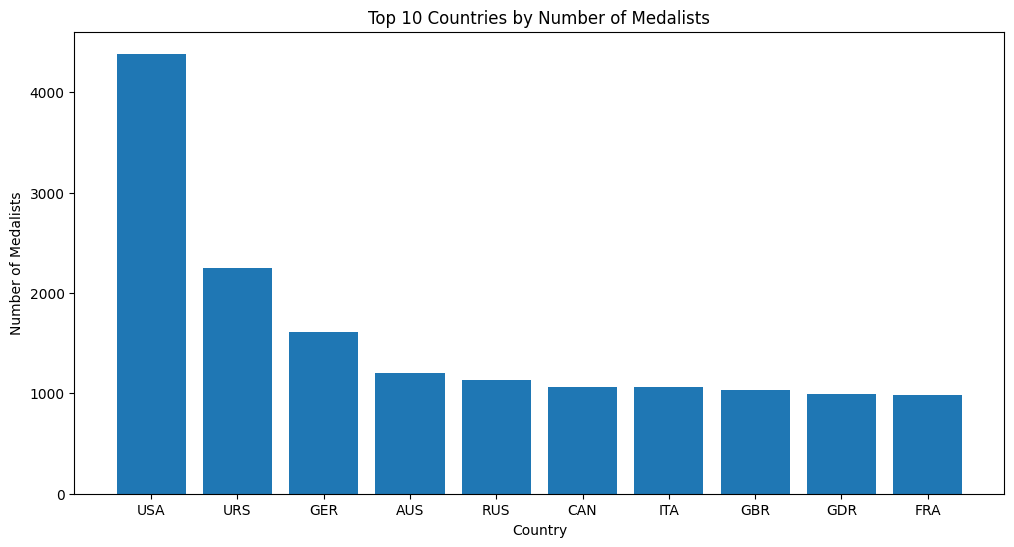

In [56]:
medals_by_country = data.groupby('NOC')['Medal'].sum()
top_10_countries = medals_by_country.sort_values(ascending=False).head(10)

x_labels = top_10_countries.index.tolist()
y_values = top_10_countries.values.tolist()

plt.figure(figsize=(12, 6))
plt.bar(x_labels, y_values)

plt.xlabel("Country")
plt.ylabel("Number of Medalists")
plt.title("Top 10 Countries by Number of Medalists")
plt.show()

### **Number of Medalists in The Top 5 Countries Over The Years**

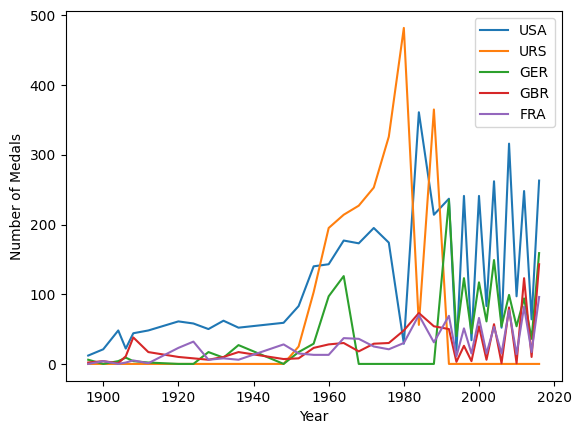

In [57]:
x = data.groupby('Year')['Medal'].sum().index
usa_Medals = data[data['NOC'] == 'USA'].groupby('Year')['Medal'].sum().reindex(x, fill_value=0)
urs_Medals = data[data['NOC'] == 'URS'].groupby('Year')['Medal'].sum().reindex(x, fill_value=0)
ger_Medals = data[data['NOC'] == 'GER'].groupby('Year')['Medal'].sum().reindex(x, fill_value=0)
gbr_Medals = data[data['NOC'] == 'GBR'].groupby('Year')['Medal'].sum().reindex(x, fill_value=0)
fra_Medals = data[data['NOC'] == 'FRA'].groupby('Year')['Medal'].sum().reindex(x, fill_value=0)
plt.plot(x, usa_Medals, label = "USA")
plt.plot(x, urs_Medals, label = "URS")
plt.plot(x, ger_Medals, label = "GER")
plt.plot(x, gbr_Medals, label = "GBR")
plt.plot(x, fra_Medals, label = "FRA")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.legend()
plt.show()


Some of these countries were missing during certain years as they might have not competed in that years Olympic games. Therefore, I had to use the reindex method to add data for the missing years inorder to ensure that each country had a medals data for each year. The x in the parameter of reindex ensures that each country is included for all of the olympic years and the fill_value = 0 ensures that countries with data missing from certain years have their medalist count for their year set to 0.

### **Distribution of Medals For Top 5 Countries by Season**

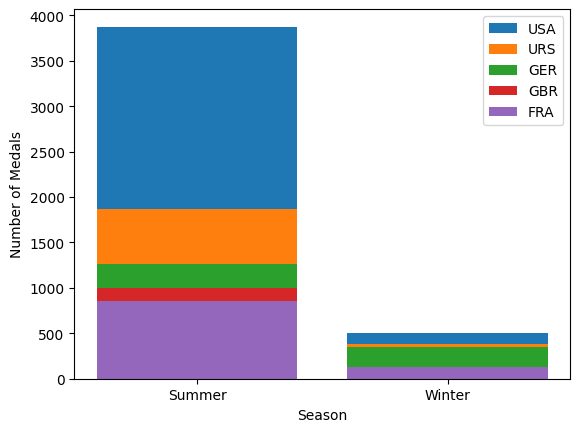

In [58]:
x = ['Summer', 'Winter']
usa_Medals = data[data['NOC'] == 'USA'].groupby('Season')['Medal'].sum()
urs_Medals = data[data['NOC'] == 'URS'].groupby('Season')['Medal'].sum()
ger_Medals = data[data['NOC'] == 'GER'].groupby('Season')['Medal'].sum()
gbr_Medals = data[data['NOC'] == 'GBR'].groupby('Season')['Medal'].sum()
fra_Medals = data[data['NOC'] == 'FRA'].groupby('Season')['Medal'].sum()
plt.bar(x, usa_Medals, label = "USA")
plt.bar(x, urs_Medals, label = "URS")
plt.bar(x, ger_Medals, label = "GER")
plt.bar(x, gbr_Medals, label = "GBR")
plt.bar(x, fra_Medals, label = "FRA")
plt.xlabel("Season")
plt.ylabel("Number of Medals")
plt.legend()
plt.show()

GBR does have some winter olympics medals, but the amount is very few compared to the other 4 countries (34 to be exact). Therefore, you can't really see it in the graph.

Distribution of Medals By Sex for Top 5 Countries

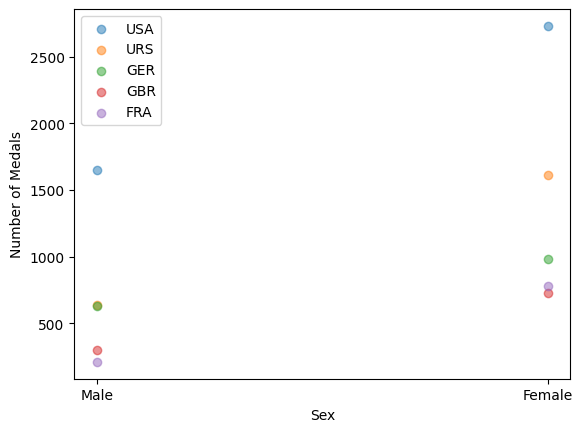

In [59]:
x = ['Male', 'Female']
usa_Medals = data[data['NOC'] == 'USA'].groupby('Sex')['Medal'].sum()
urs_Medals = data[data['NOC'] == 'URS'].groupby('Sex')['Medal'].sum()
ger_Medals = data[data['NOC'] == 'GER'].groupby('Sex')['Medal'].sum()
gbr_Medals = data[data['NOC'] == 'GBR'].groupby('Sex')['Medal'].sum()
fra_Medals = data[data['NOC'] == 'FRA'].groupby('Sex')['Medal'].sum()
plt.scatter(x, usa_Medals, label = "USA", alpha = 0.5)
plt.scatter(x, urs_Medals, label = "URS", alpha = 0.5)
plt.scatter(x, ger_Medals, label = "GER", alpha = 0.5)
plt.scatter(x, gbr_Medals, label = "GBR", alpha = 0.5)
plt.scatter(x, fra_Medals, label = "FRA", alpha = 0.5)
plt.xlabel("Sex")
plt.ylabel("Number of Medals")
plt.legend()
plt.show()

## **Research Question**

**How does an athletes physique/age affect their performance at the olympic and how does this relationship differ between the summer and winter games? (How does the top performing athletes in these two game's physique differ)**

### **Summer Olympics**

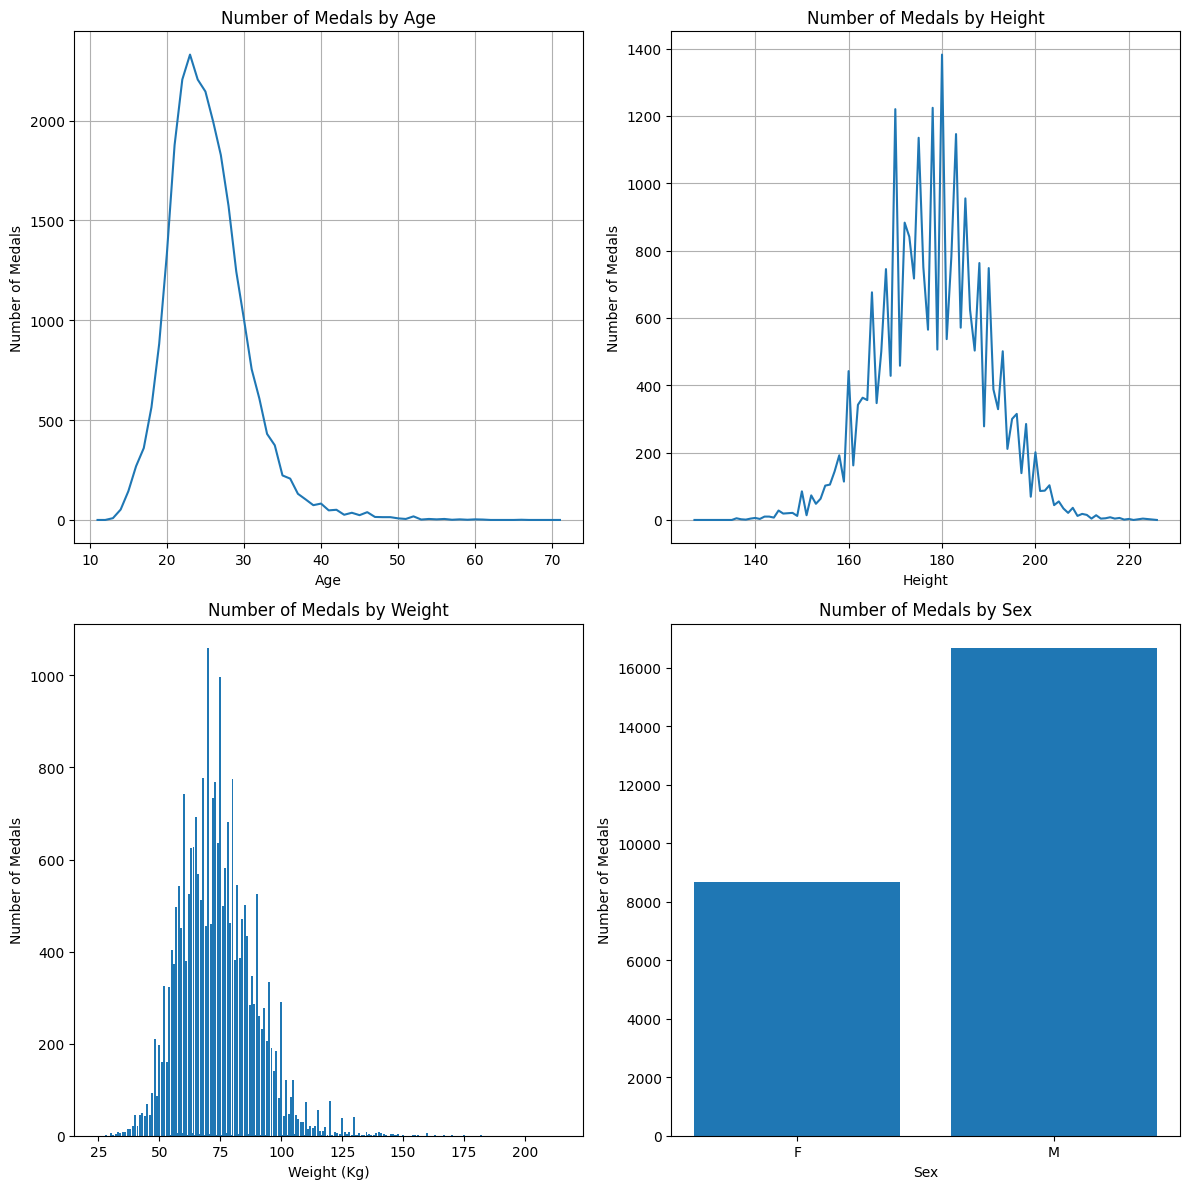

In [60]:
summer_data = data[data['Season'] == 'Summer']
plt.figure(figsize = (12, 12))
plt.subplot(2, 2, 1)
x = summer_data.groupby('Age')['Medal'].sum().index
medals = summer_data.groupby('Age')['Medal'].sum().reindex(x, fill_value=0)
plt.plot(x, medals)
plt.xlabel("Age")
plt.ylabel("Number of Medals")
plt.title("Number of Medals by Age")
plt.grid(True)


plt.subplot(2, 2, 2)
x = summer_data.groupby('Height')['Medal'].sum().index
medals = summer_data.groupby('Height')['Medal'].sum()
plt.plot(x, medals)
plt.xlabel("Height")
plt.ylabel("Number of Medals")
plt.title("Number of Medals by Height")
plt.grid(True)

plt.subplot(2, 2, 3)
x = summer_data.groupby('Weight')['Medal'].sum().index
medals = summer_data.groupby('Weight')['Medal'].sum()
plt.bar(x, medals)
plt.xlabel("Weight (Kg)")
plt.ylabel("Number of Medals")
plt.title("Number of Medals by Weight")

plt.subplot(2, 2, 4)
x = summer_data.groupby('Sex')['Medal'].sum().index
medals = summer_data.groupby('Sex')['Medal'].sum().reindex(x, fill_value=0)
plt.bar(x, medals)
plt.xlabel("Sex")
plt.ylabel("Number of Medals")
plt.title("Number of Medals by Sex")

plt.tight_layout()
plt.show()

The prime age for an athlete to win a medal is around 20 years old.

### **Winter Olympics**

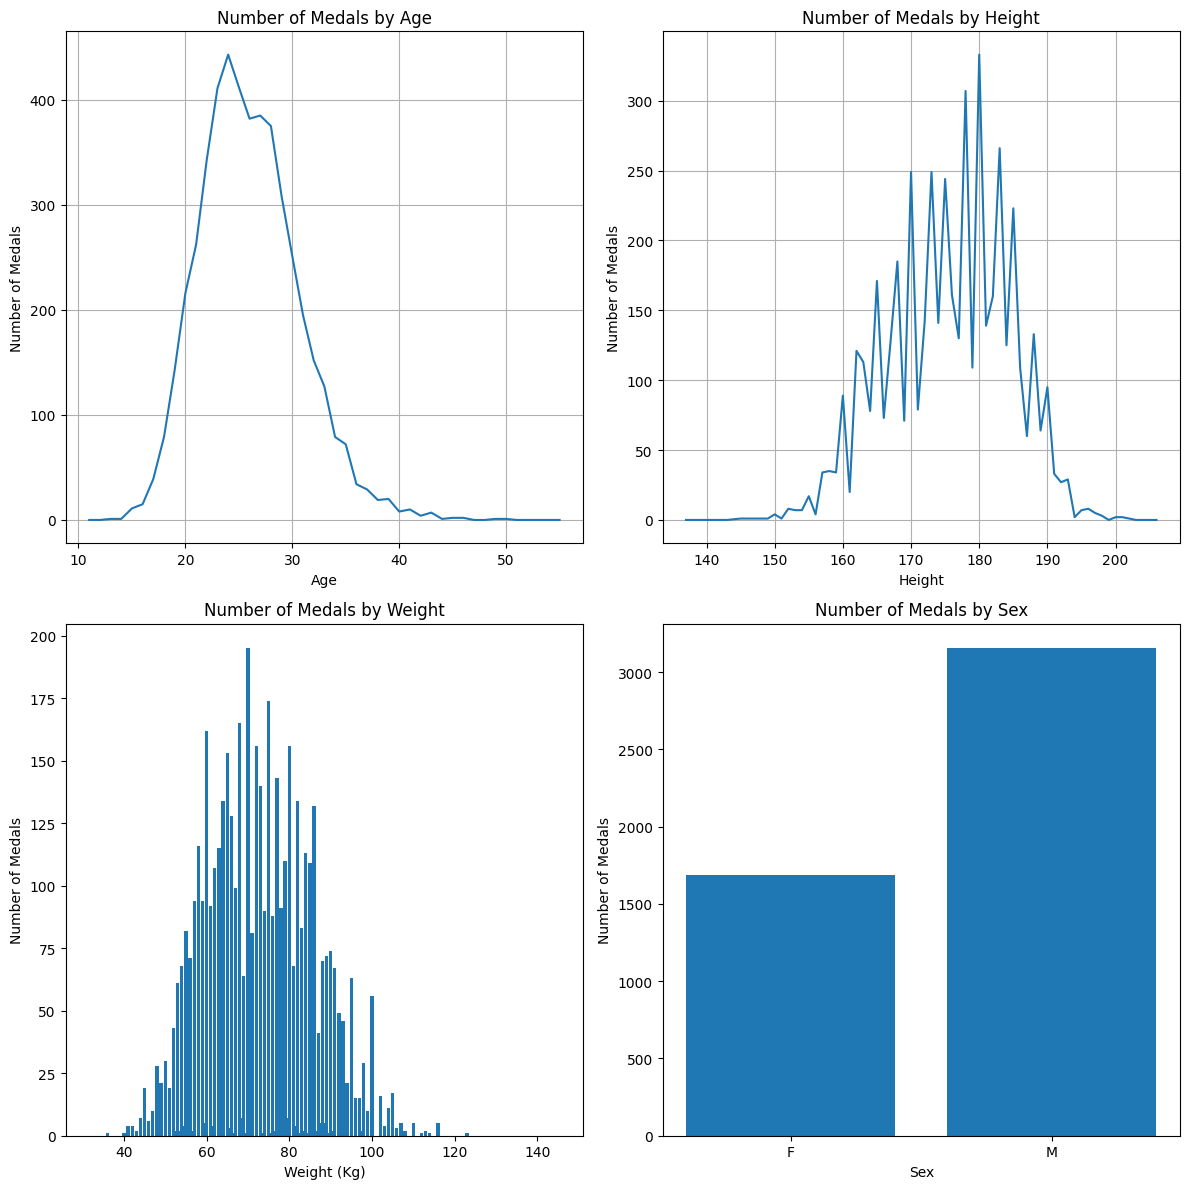

In [61]:
winter_data = data[data['Season'] == 'Winter']
plt.figure(figsize = (12, 12))
plt.subplot(2, 2, 1)
x = winter_data.groupby('Age')['Medal'].sum().index
medals = winter_data.groupby('Age')['Medal'].sum().reindex(x, fill_value=0)
plt.plot(x, medals)
plt.xlabel("Age")
plt.ylabel("Number of Medals")
plt.title("Number of Medals by Age")
plt.grid(True)


plt.subplot(2, 2, 2)
x = winter_data.groupby('Height')['Medal'].sum().index
medals = winter_data.groupby('Height')['Medal'].sum()
plt.plot(x, medals)
plt.xlabel("Height")
plt.ylabel("Number of Medals")
plt.title("Number of Medals by Height")
plt.grid(True)

plt.subplot(2, 2, 3)
x = winter_data.groupby('Weight')['Medal'].sum().index
medals = winter_data.groupby('Weight')['Medal'].sum()
plt.bar(x, medals)
plt.xlabel("Weight (Kg)")
plt.ylabel("Number of Medals")
plt.title("Number of Medals by Weight")

plt.subplot(2, 2, 4)
x = winter_data.groupby('Sex')['Medal'].sum().index
medals = winter_data.groupby('Sex')['Medal'].sum().reindex(x, fill_value=0)
plt.bar(x, medals)
plt.xlabel("Sex")
plt.ylabel("Number of Medals")
plt.title("Number of Medals by Sex")

plt.tight_layout()
plt.show()

## **Hypothesis:**

**Null Hypothesis:** An athletes physique/age has no affect on their performance at the olympics.

**Alternate Hypothesis:** There is an significant relationship between an athletes physique/age and their performance at the olympics.

### **Stat Test Using Logistic Regression**

In [62]:
data_filtered = data[['Age', 'Height', 'Weight', 'Season', 'Medal']].dropna()

summer_data = data_filtered[data_filtered['Season'] == 'Summer']
winter_data = data_filtered[data_filtered['Season'] == 'Winter']

summer_model = smf.logit("Medal ~ Age + Height + Weight", data=summer_data).fit()
winter_model = smf.logit("Medal ~ Age + Height + Weight", data=winter_data).fit()


print("\n-------- P-values --------")
print("Summer:")
print(summer_model.pvalues)
print("----------------------------")
print("Winter:")
print(winter_model.pvalues)


Optimization terminated successfully.
         Current function value: 0.421200
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.368429
         Iterations 6

-------- P-values --------
Summer:
Intercept    1.440425e-278
Age           6.963344e-02
Height        6.418293e-59
Weight        1.260292e-25
dtype: float64
----------------------------
Winter:
Intercept    7.036414e-13
Age          1.247625e-33
Height       7.918211e-02
Weight       2.373836e-12
dtype: float64


## **P-Values Interpretation:**

**Summer :**


*   Age doesn't have a significant affect on an athlete's performance.
*   Height has an significant affect on an athlete's performance.
*   Weight has an significant affect on an athlete's performance.

**Winter :**


*   Age has an significant affect on an athletes performance.
*   Height doesn't have a significant affect on an athlete's performance.
*   Weight has an significant affect on an athletes performance.






## **ML Model**

### **Linear Regression ML Model For Winter Games**

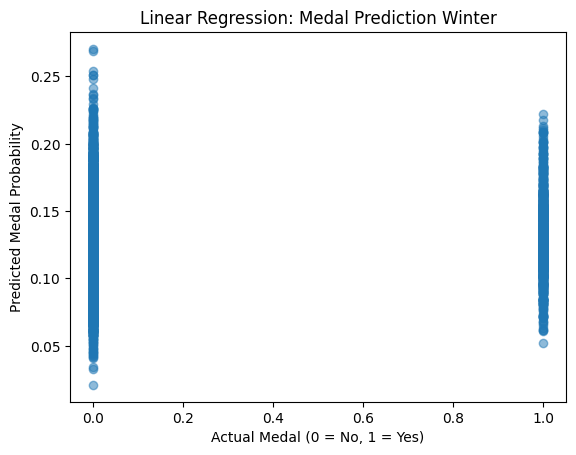

In [75]:
winter_data = data[data['Season'] == 'Winter']

X = winter_data[['Age', 'Height', 'Weight']]
y = winter_data['Medal']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
winter_model = LinearRegression()

#Fit Model
winter_model.fit(X_train, y_train)

# Predict
pred = winter_model.predict(X_test)

# Plot
plt.scatter(y_test, pred, alpha=0.5)
plt.xlabel('Actual Medal (0 = No, 1 = Yes)')
plt.ylabel('Predicted Medal Probability')
plt.title('Linear Regression: Medal Prediction Winter')
plt.show()

In [76]:
print('mean squared: ', mean_squared_error(y_test, pred))

print('r squared: ', r2_score(y_test, pred))

y_pred_binary = (pred >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy: ", accuracy)

mean squared:  0.10494051629546763
r squared:  0.008017588207963389
Accuracy:  0.879751647237709


### **Linear Regression ML Model For Summer Games**

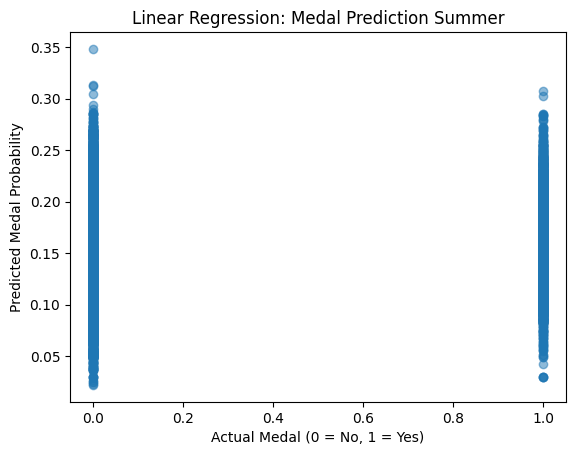

In [77]:
summer_data = data[data['Season'] == 'Summer']

X = summer_data[['Age', 'Height', 'Weight']]
y = summer_data['Medal']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
summer_model = LinearRegression()

#Fit Model
summer_model.fit(X_train, y_train)

# Predict
pred = summer_model.predict(X_test)

# Plot
plt.scatter(y_test, pred, alpha=0.5)
plt.xlabel('Actual Medal (0 = No, 1 = Yes)')
plt.ylabel('Predicted Medal Probability')
plt.title('Linear Regression: Medal Prediction Summer')
plt.show()

In [78]:
print('mean squared: ', mean_squared_error(y_test, pred))

print('r squared: ', r2_score(y_test, pred))

y_pred_binary = (pred >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

mean squared:  0.12674069161598017
r squared:  0.009491343462767143
Accuracy: 0.8493491692160038
